In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('cleaned_shark.csv')

In [3]:
df.head()

,Unnamed: 0,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,...,shark_group,title,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Ionic Ear,1-1,0,1,1000000,15,6666667,1,0
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Mr. Tod's Pie Factory,1-1,1,1,460000,10,4600000,1,0
2,2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Ava the Elephant,1-1,1,1,50000,15,333333,1,0
3,3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,College Foxes Packing Boxes,1-1,0,1,250000,25,1000000,1,0
4,4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,A Perfect Pear,1-2,1,2,500000,15,3333333,1,0


In [4]:
dict(df.category.value_counts())

{'Specialty Food': 59,
 'Novelties': 31,
 'Baby and Child Care': 23,
 'Personal Care and Cosmetics': 19,
 'Online Services': 18,
 'Storage and Cleaning Products': 17,
 'Toys and Games': 15,
 'Consumer Services': 12,
 'Pet Products': 11,
 'Kitchen Tools': 11,
 'Outdoor Recreation': 10,
 'Electronics': 9,
 "Baby and Children's Entertainment": 9,
 "Men and Women's Apparel": 9,
 "Baby and Children's Apparel and Accessories": 8,
 'Professional Services': 8,
 'Entertainment': 8,
 "Women's Apparel": 8,
 'Automotive': 8,
 'Holiday Cheer': 7,
 'Undergarments and Basics': 7,
 "Women's Accessories": 6,
 'Fitness Programs': 6,
 'Home Accessories': 6,
 'Homeopathic Remedies': 6,
 'Weddings': 6,
 'Home Improvement': 5,
 'Fitness Apparel and Accessories': 5,
 'Non-Alcoholic Beverages': 5,
 'Health and Well-Being': 5,
 'Gardening': 5,
 "Men and Women's Shoes": 5,
 "Men's Accessories": 5,
 'Furniture': 5,
 'Party Supplies': 4,
 "Women's Shoes": 4,
 "Men and Women's Accessories": 4,
 'Music': 4,
 'Alcoh

In [5]:
cat_key=[]
cat_val=[]
for key in dict(df.category.value_counts()).keys():
    cat_key.append(key)
for val in dict(df.category.value_counts()).values():
    cat_val.append(val)

In [6]:
cat_key=cat_key[0:15]
cat_val=cat_val[0:15]

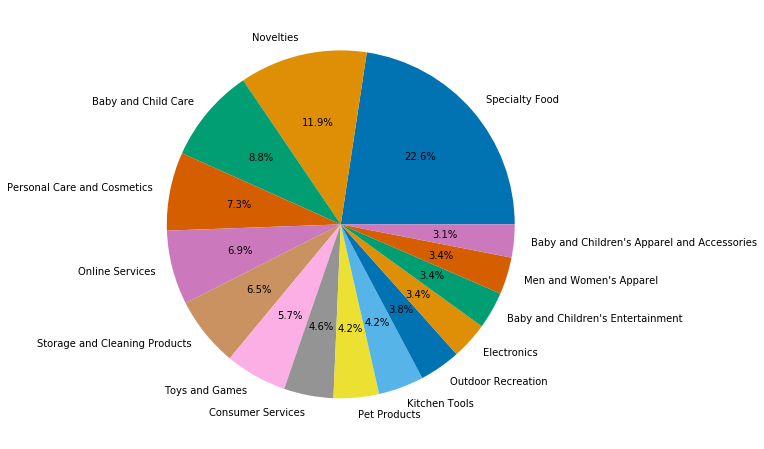

In [7]:
with sns.color_palette('colorblind'):
    plt.figure(figsize=(15,8))
    plt.pie(x=cat_val,labels=cat_key,autopct='%1.1f%%',)
    plt.show()

In [8]:
df.columns

Index(['Unnamed: 0', 'description', 'category', 'entrepreneurs', 'location',
       'website', 'website_length', 'shark1', 'shark2', 'shark3', 'shark4',
       'shark5', 'sharks', 'shark_group', 'title', 'episode-season', 'deal',
       'episode', 'askedFor', 'exchangeForStake', 'valuation', 'season',
       'Multiple_Entreprenuers'],
      dtype='object')

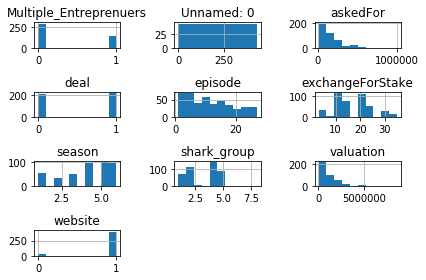

In [9]:
df.hist()
plt.tight_layout()
plt.show()

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
for col in ['askedFor','exchangeForStake','valuation']:
    df[f'{col}_bin']=pd.cut(df[col],bins=3,labels=[0,1,2])

In [12]:
df.head()

,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,shark4,...,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,askedFor_bin,exchangeForStake_bin,valuation_bin
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,1000000,15,6666667,1,0,2,1,2
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,460000,10,4600000,1,0,1,0,1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,50000,15,333333,1,0,0,1,0
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,250000,25,1000000,1,0,0,2,0
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,2,500000,15,3333333,1,0,1,1,1


In [13]:
df[df.duplicated(subset='entrepreneurs')==True].entrepreneurs.unique()

array(['James Martin', nan, 'Dave Alwan'], dtype=object)

## Target correlations

In [14]:
a=list(dict(df.category.value_counts()))[0:20]

In [15]:
top_cat_df = df[df.category.isin(a)]

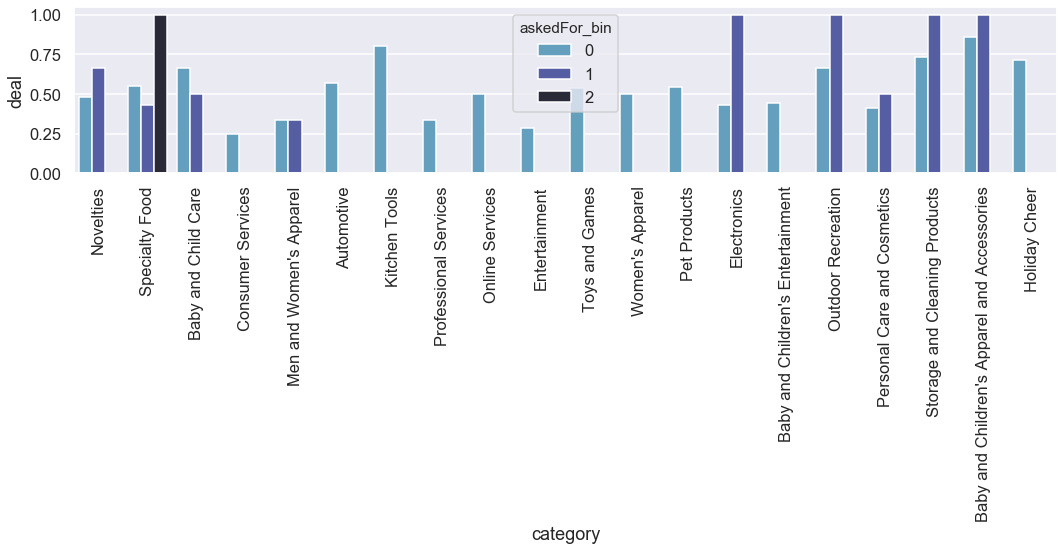

In [16]:
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('talk'):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(1,1,1)
            sns.barplot(top_cat_df.category,top_cat_df.deal,ci=None,hue=top_cat_df.askedFor_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.show()

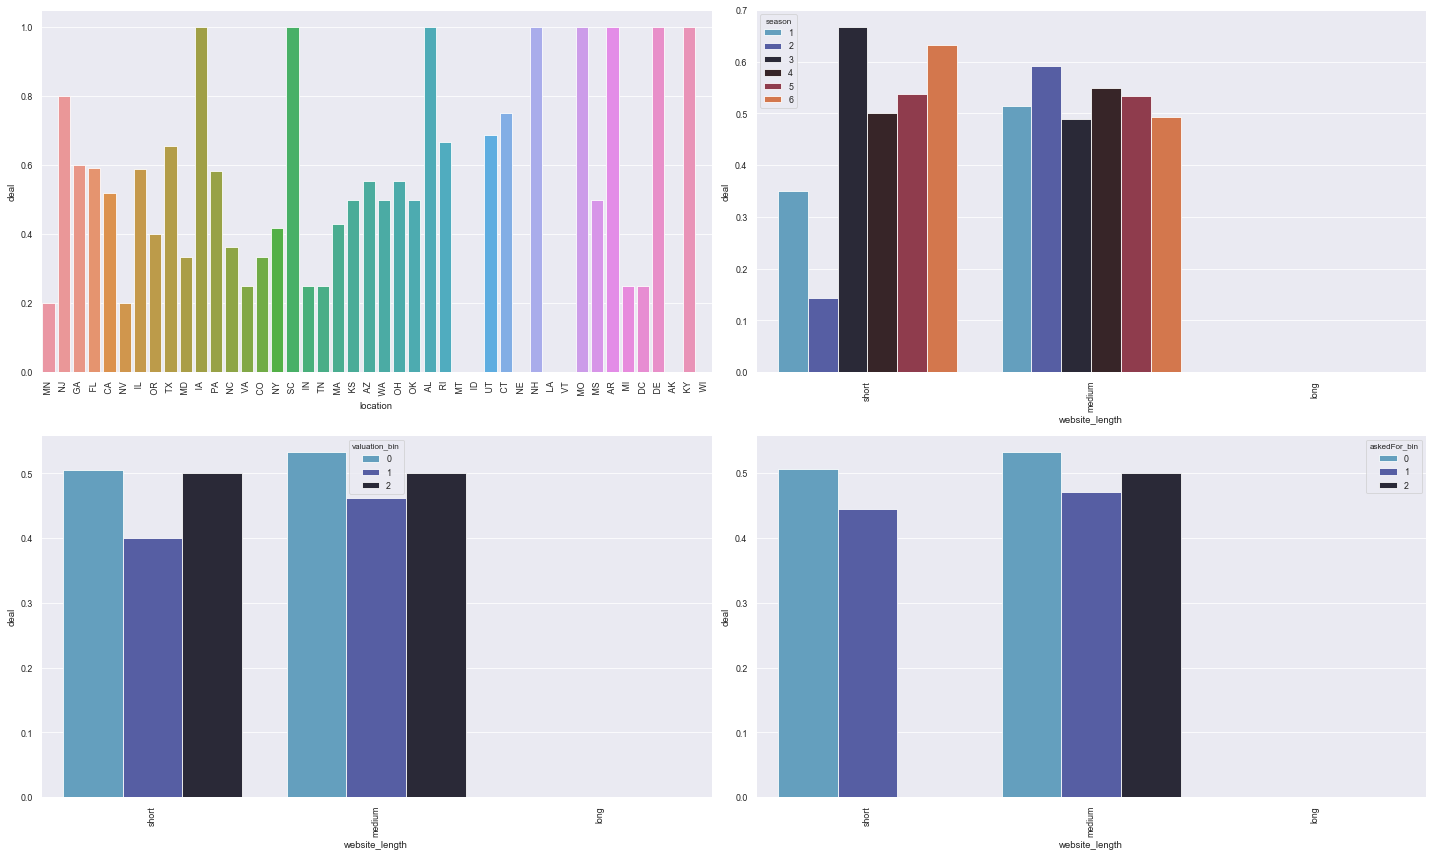

In [17]:
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.barplot(df.location,df.deal,ci=None)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,2)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.season)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,3)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.valuation_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,4)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.askedFor_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.show()

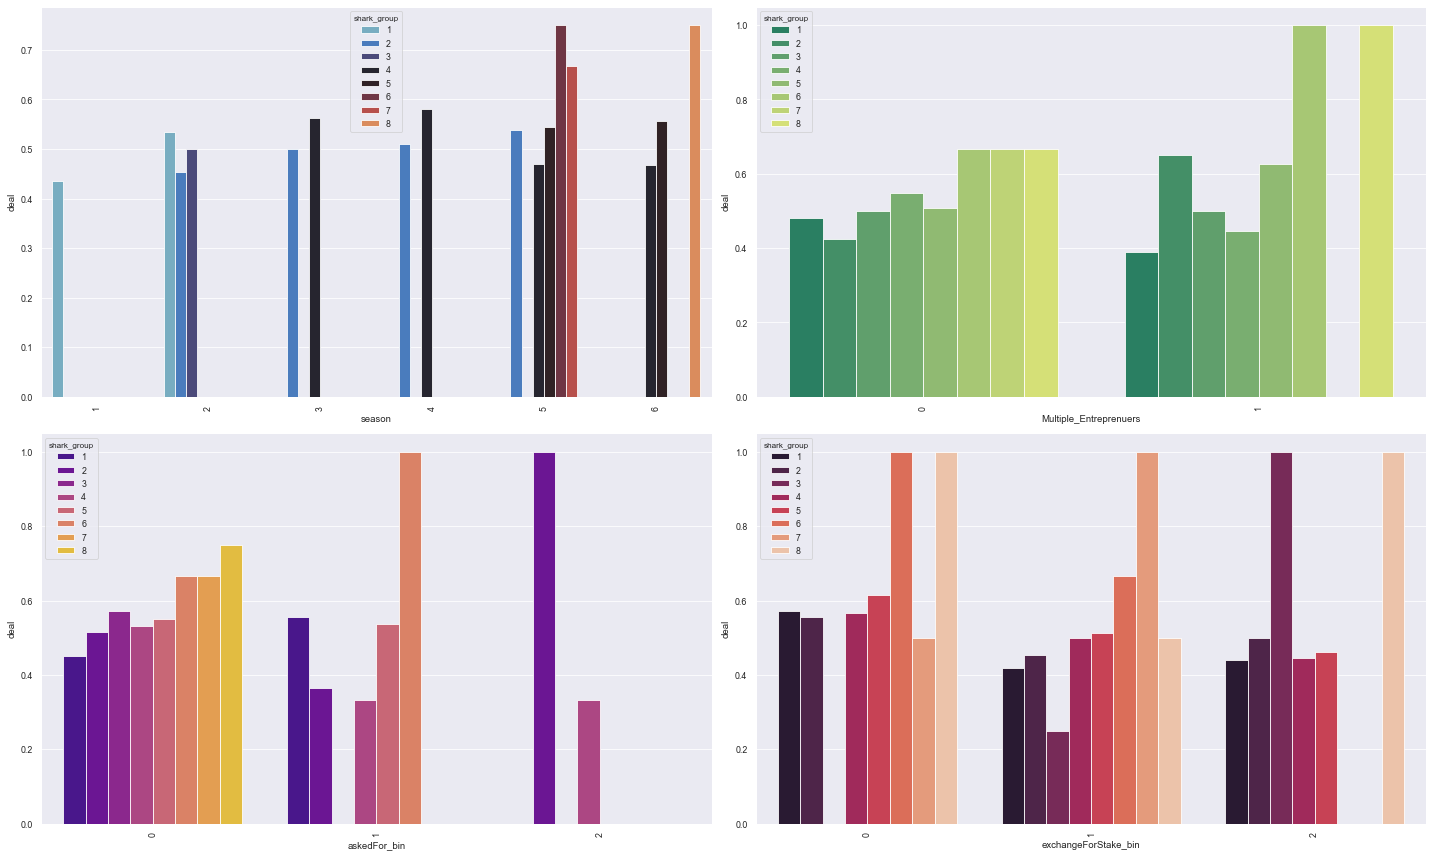

In [18]:
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.barplot(df.season,df.deal,ci=None,hue=df.shark_group,palette='icefire')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,2)
            sns.barplot(df.Multiple_Entreprenuers,df.deal,ci=None,hue=df.shark_group,palette='summer')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,3)
            sns.barplot(df.askedFor_bin,df.deal,ci=None,hue=df.shark_group,palette='plasma')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,4)
            sns.barplot(df.exchangeForStake_bin,df.deal,ci=None,hue=df.shark_group,palette='rocket')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.show()

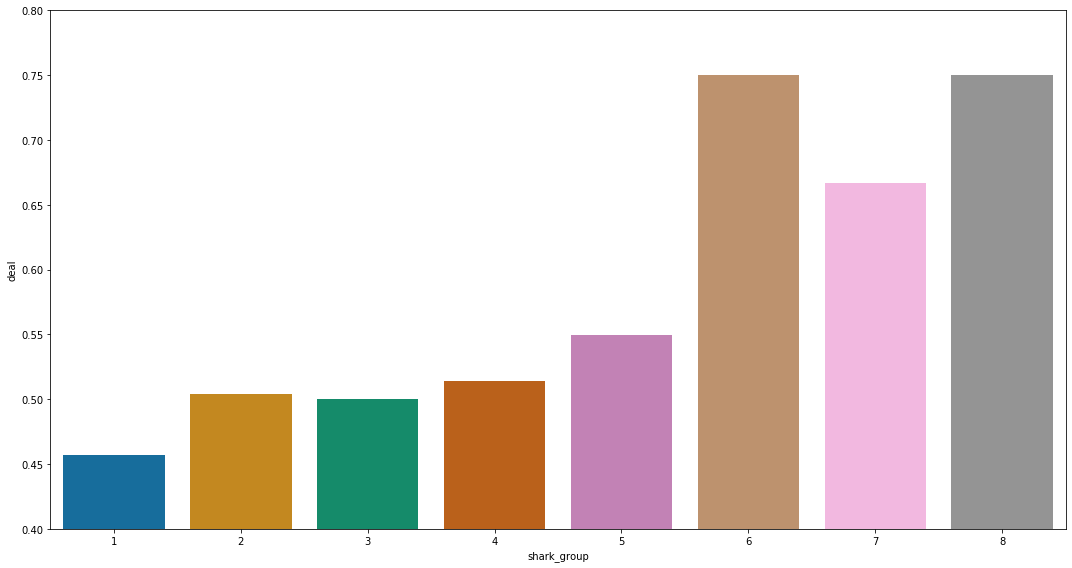

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(df.shark_group,df.deal,ci=False,palette='colorblind')
plt.ylim(0.4,0.8)
plt.tight_layout()
plt.show()

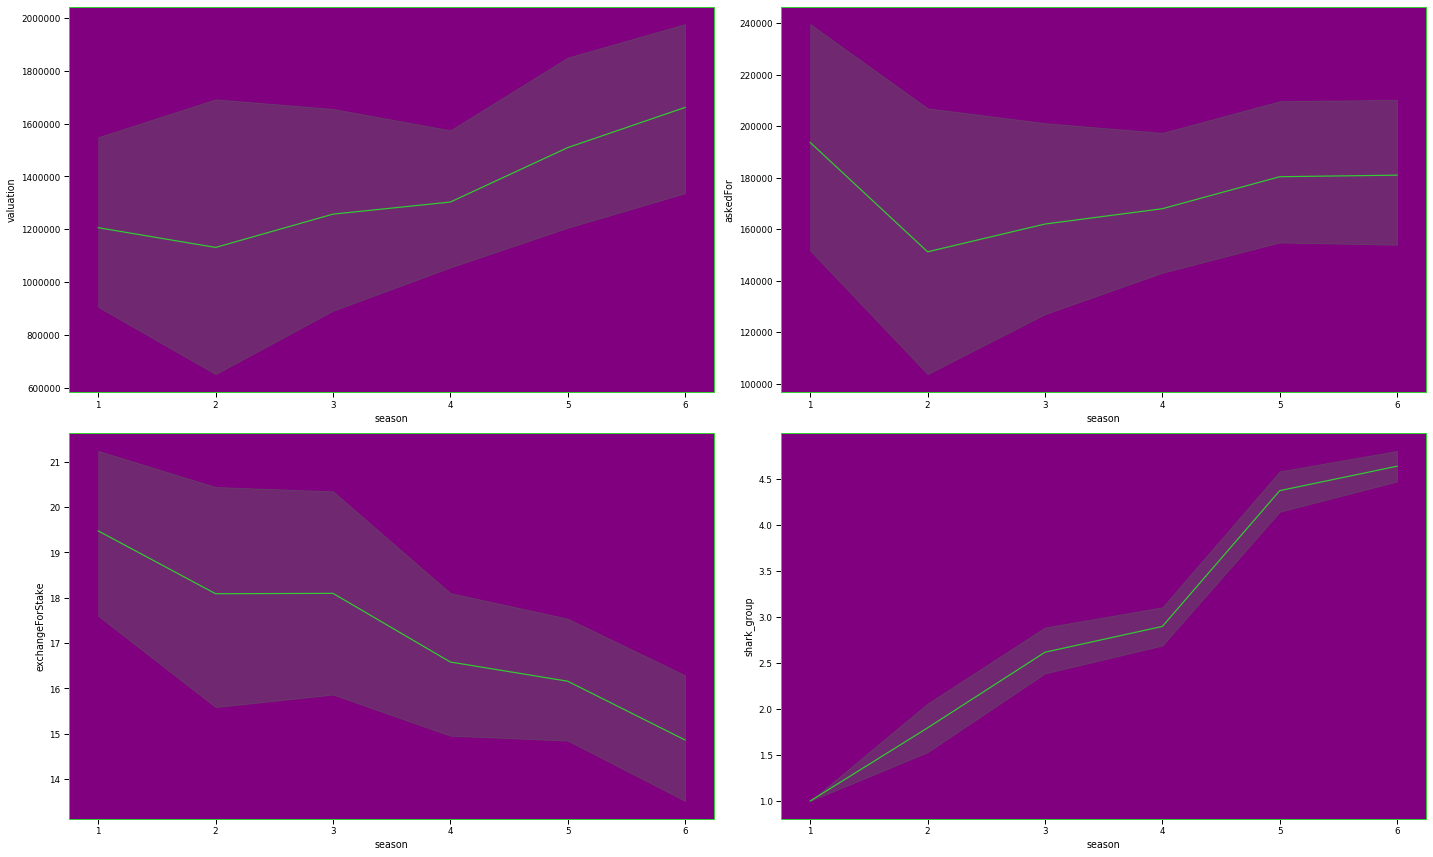

In [19]:
with sns.axes_style({'axes.facecolor':'purple','axes.edgecolor':'limegreen'}):
    with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.lineplot(df.season,df.valuation,color='limegreen')
            plt.tight_layout()
            
            plt.subplot(2,2,2)
            sns.lineplot(df.season,df.askedFor,color='limegreen')
            plt.tight_layout()

            plt.subplot(2,2,3)
            sns.lineplot(df.season,df.exchangeForStake,color='limegreen')
            plt.tight_layout()
            
            plt.subplot(2,2,4)
            sns.lineplot(df.season,df.shark_group,color='limegreen')
            plt.tight_layout()
            
            plt.show()

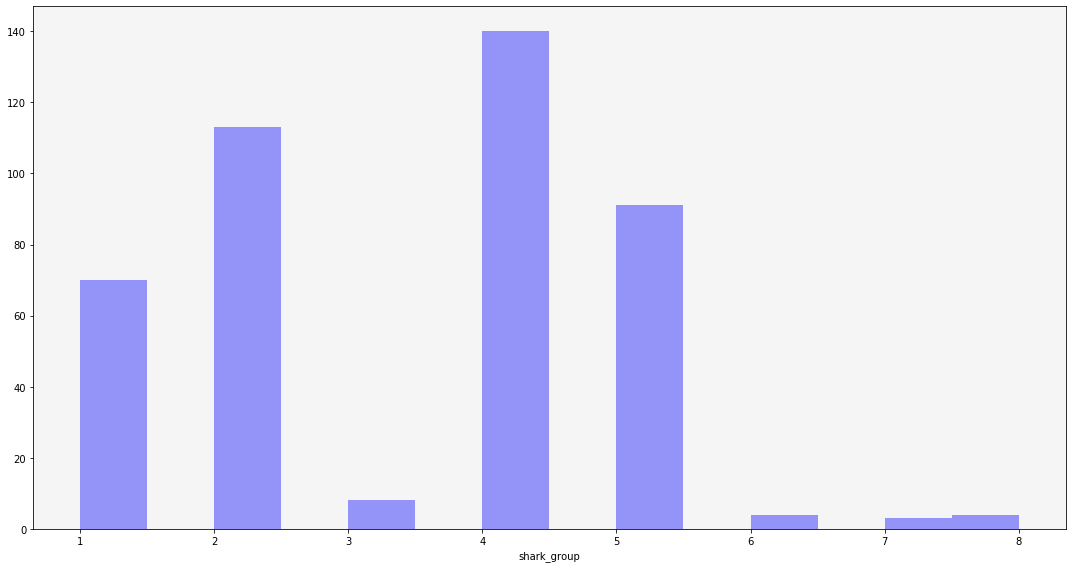

In [20]:
with sns.axes_style({'axes.facecolor':'whitesmoke'}):

    plt.figure(figsize=(15,8))

    sns.distplot(df.shark_group,kde=False,color='blue')
    
    plt.tight_layout()

    plt.show()

## Now, I will set up some data to see trends over the seasons

In [21]:
s1 = df[df.season==1]
s2 = df[df.season==2]
s3 = df[df.season==3]
s4 = df[df.season==4]
s5 = df[df.season==5]
s6 = df[df.season==6]

In [22]:
s1.describe()

,website,shark_group,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers
count,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.0,55.000000
mean,0.709091,1.0,0.436364,7.181818,193618.181818,19.472727,1.205598e+06,1.0,0.290909
std,0.458368,0.0,0.500505,4.114522,171036.328273,6.882222,1.289079e+06,0.0,0.458368
min,0.000000,1.0,0.000000,1.000000,30000.000000,10.000000,1.000000e+05,1.0,0.000000
25%,0.000000,1.0,0.000000,4.000000,77500.000000,15.000000,4.650000e+05,1.0,0.000000
50%,1.000000,1.0,0.000000,7.000000,150000.000000,20.000000,7.575760e+05,1.0,0.000000
75%,1.000000,1.0,1.000000,11.000000,250000.000000,25.000000,1.416666e+06,1.0,1.000000
max,1.000000,1.0,1.000000,14.000000,1000000.000000,35.000000,6.666667e+06,1.0,1.000000


In [23]:
df_s = pd.DataFrame(columns=['season','pitches','deal_mean','askedFor_mean','askedFor_max','askedFor_min',
                            'stake_mean','stake_max','stake_min',
                            'value_mean','value_max','value_min'])

In [24]:
ss=[s1.describe(),s2.describe(),s3.describe(),s4.describe(),s5.describe(),s6.describe()]

In [25]:
for col in df_s.columns:
    df_s[col]=df_s[col].astype(float)
    df_s[col]=4

In [26]:
df_s.pitches=[4,4,4,4,4,4]

In [27]:
df_s

,season,pitches,deal_mean,askedFor_mean,askedFor_max,askedFor_min,stake_mean,stake_max,stake_min,value_mean,value_max,value_min
0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
i = 0
for dfr in ss:
    
    df_s.season[i]=i
    df_s.pitches[i]=dfr.website[0]
    df_s.deal_mean[i]=dfr.deal[1]
    df_s.askedFor_mean[i]=dfr.askedFor[1]
    df_s.askedFor_max[i]=dfr.askedFor[7]
    df_s.askedFor_min[i]=dfr.askedFor[3]
    df_s.stake_mean[i]=dfr.exchangeForStake[1]
    df_s.stake_max[i]=dfr.exchangeForStake[7]
    df_s.stake_min[i]=dfr.exchangeForStake[3]
    df_s.value_mean[i]=dfr.valuation[1]
    df_s.value_max[i]=dfr.valuation[7]
    df_s.value_min[i]=dfr.valuation[3]
    i = i+1

In [29]:
df_s

,season,pitches,deal_mean,askedFor_mean,askedFor_max,askedFor_min,stake_mean,stake_max,stake_min,value_mean,value_max,value_min
0,0.0,55,0.436364,193618.181818,1000000.0,30000.0,19.472727,35.0,10.0,1.205598e+06,6666667.0,100000.0
1,1.0,34,0.500000,151176.470588,500000.0,25000.0,18.088235,30.0,5.0,1.130735e+06,6000000.0,125000.0
2,2.0,52,0.519231,161961.538462,540000.0,10000.0,18.096154,35.0,3.0,1.256879e+06,6666667.0,40000.0
3,3.0,96,0.541667,167906.250000,1000000.0,25000.0,16.583333,35.0,5.0,1.302738e+06,8333333.0,100000.0
4,4.0,100,0.530000,180330.000000,700000.0,10000.0,16.160000,33.0,3.0,1.508961e+06,8600000.0,100000.0
5,5.0,96,0.520833,180937.500000,750000.0,20000.0,14.864583,35.0,4.0,1.661149e+06,7500000.0,100000.0


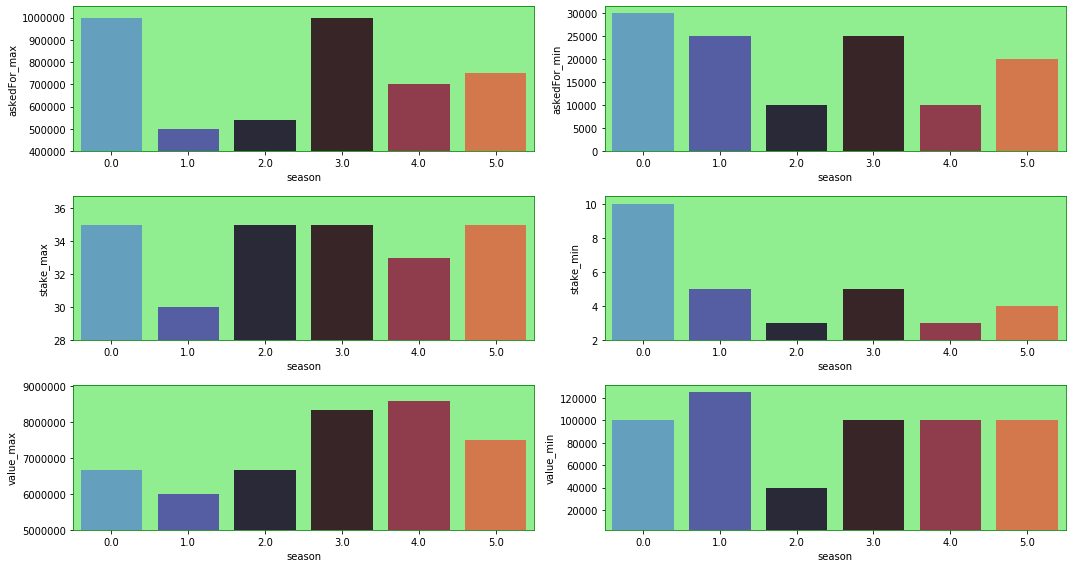

In [30]:
with sns.color_palette('icefire'):
    with sns.axes_style({'axes.facecolor':'lightgreen','axes.edgecolor':'green'}):

        plt.figure(figsize=(15,8))

        plt.subplot(3,2,1)
        sns.barplot(df_s.season,df_s.askedFor_max)
        plt.tight_layout()
        plt.ylim(400000)

        plt.subplot(3,2,2)
        sns.barplot(df_s.season,df_s.askedFor_min)
        plt.tight_layout()

        plt.subplot(3,2,3)
        sns.barplot(df_s.season,df_s.stake_max)
        plt.tight_layout()
        plt.ylim(28,)

        plt.subplot(3,2,4)
        sns.barplot(df_s.season,df_s.stake_min)
        plt.tight_layout()
        plt.ylim(2,)

        plt.subplot(3,2,5)
        sns.barplot(df_s.season,df_s.value_max)
        plt.tight_layout()
        plt.ylim(5000000)

        plt.subplot(3,2,6)
        sns.barplot(df_s.season,df_s.value_min)
        plt.tight_layout()
        plt.ylim(2500)

        plt.show()

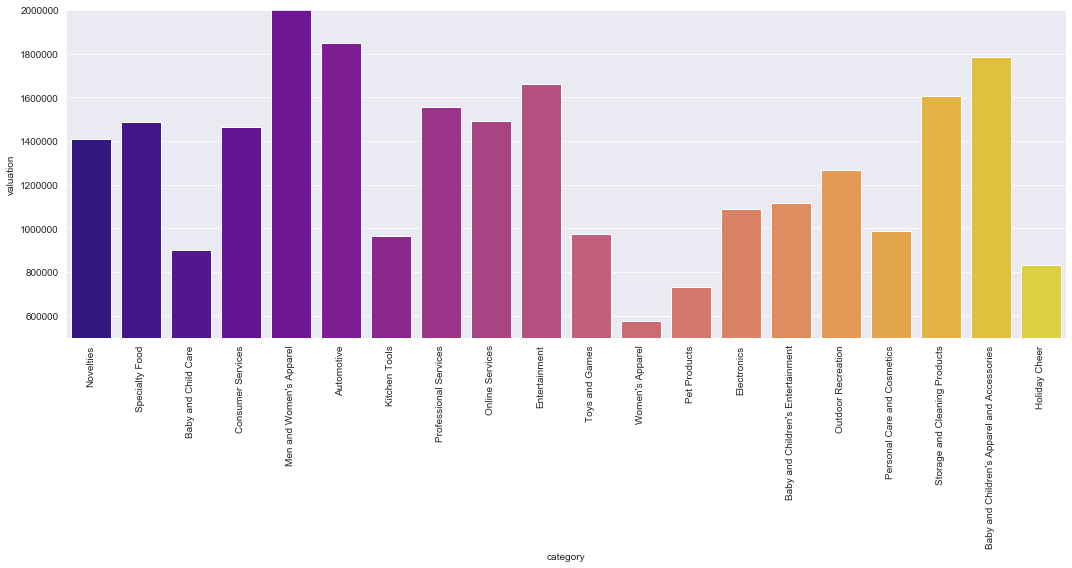

In [31]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,8))
    sns.barplot(top_cat_df.category,top_cat_df.valuation,palette='plasma',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(500000,2*10**6)
    plt.tight_layout()
    plt.show()

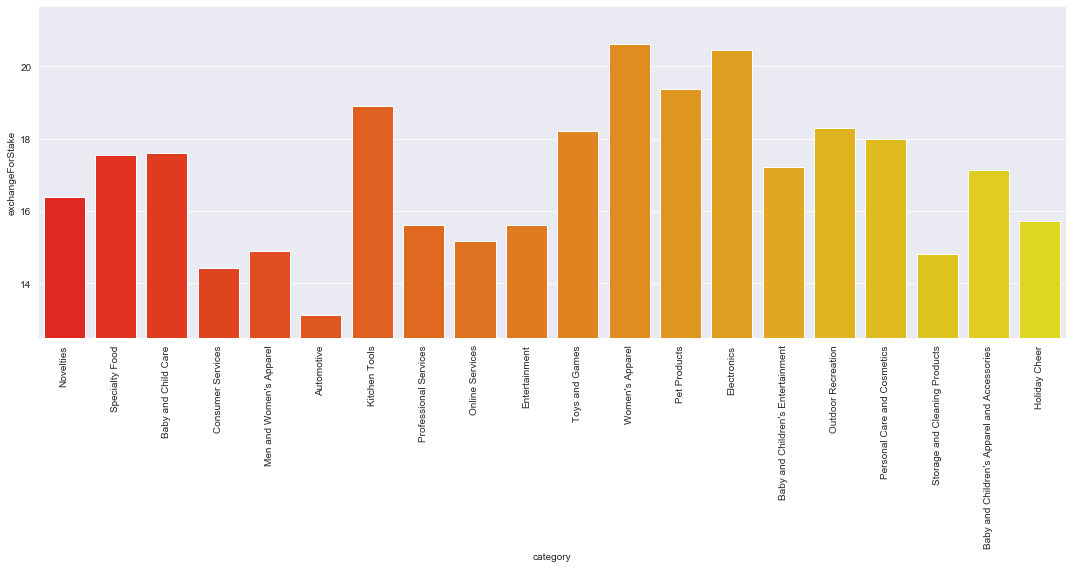

In [32]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,8))
    sns.barplot(top_cat_df.category,top_cat_df.exchangeForStake,palette='autumn',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(12.5)
    plt.tight_layout()
    plt.show()

In [33]:
df.sharks.unique()

array(['[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Kevin Harrington\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Jeff Foxworthy\', \'Daymond John\']',
       '[\'Lori Greiner\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', \'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'John Paul DeJoria\']',
       '[\'Lori Greiner\', \'Steve Tisch\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'Nick Woodman\']'],
      dtype=object)

In [34]:
no_guest=df[df.shark_group.isin([1,2,4,5])]

In [35]:
guest_shark = df[df.shark_group.isin([3,6,7,8])]

In [36]:
guest_shark
# deal asked for stake valuation

,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,shark4,...,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,askedFor_bin,exchangeForStake_bin,valuation_bin
67,A country-style apparel store sold through Spo...,Men and Women's Apparel,Mike Abbaticchio & Shon Lees,FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,4,50000,25,200000,2,0,0,2,0
68,A children's seat attachable to luggage that i...,Baby and Child Care,Darryl and Randy Lenz,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,4,50000,25,200000,2,1,0,2,0
69,Premium beef jerky made without additives or p...,Specialty Food,Ken Howell,NC,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,4,25000,20,125000,2,0,0,1,0
70,A rubber band that works as a money clip.,Novelties,Johnny Gennaro & Vinny Pastore,NY,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,4,50000,20,250000,2,0,0,1,0
79,An impact-resistant hydration system that atta...,Fitness Apparel and Accessories,Chris Spencer,TX,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,7,50000,25,200000,2,0,0,2,0
80,A mobile entertainment company running special...,Entertainment,Stuart and David Pikoff,TX,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,7,500000,10,5000000,2,1,1,0,1
81,"A barf bag worn around the neck, for small chi...",Baby and Child Care,Les Cookson,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,7,30000,15,200000,2,0,0,1,0
82,A push mower marketed as a more eco-friendly a...,Gardening,Andy Humphrey,MD,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,7,90000,20,450000,2,0,0,1,0
259,"An all-electric, jet-propelled body board.",Outdoor Recreation,NaN,CA,1,medium,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,...,0,7,250000,20,1250000,5,0,0,1,0
260,Tree T Pee is an agricultural water conservati...,Gardening,John (Johnny) G. Georges,FL,1,medium,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,...,1,7,150000,20,750000,5,0,0,1,0


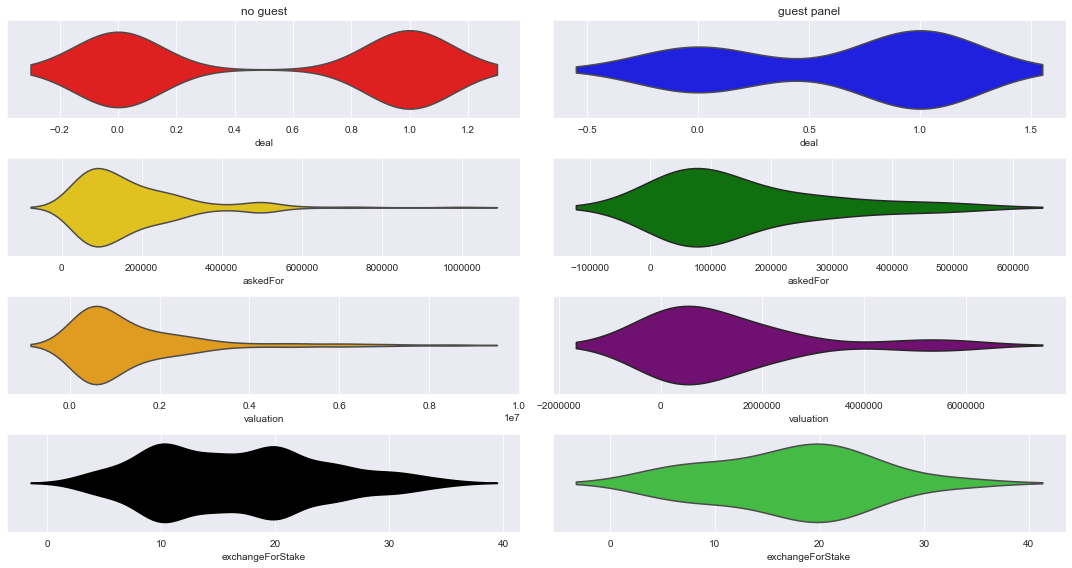

In [63]:
with sns.axes_style('darkgrid'):

    colors = ['red','blue','gold','green','orange','purple','black','limegreen']

    plt.figure(figsize=(15,8))

    plt.subplot(4,2,1)
    sns.violinplot(no_guest.deal,color=colors[0],inner=None)
    plt.tight_layout()
    plt.title('no guest')

    plt.subplot(4,2,2)
    sns.violinplot(guest_shark.deal,color=colors[1],inner=None)
    plt.tight_layout()
    plt.title('guest panel')

    plt.subplot(4,2,3)
    sns.violinplot(no_guest.askedFor,color=colors[2],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,4)
    sns.violinplot(guest_shark.askedFor,color=colors[3],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,5)
    sns.violinplot(no_guest.valuation,color=colors[4],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,6)
    sns.violinplot(guest_shark.valuation,color=colors[5],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,7)
    sns.violinplot(no_guest.exchangeForStake,color=colors[6],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,8)
    sns.violinplot(guest_shark.exchangeForStake,color=colors[7],inner=None)
    plt.tight_layout()

    plt.show()

In [49]:
df.location.value_counts()

 CA    123
 NY     36
 TX     32
 FL     27
 IL     17
 UT     16
 OR     15
 GA     15
 CO     12
 PA     12
 NC     11
 NJ     10
 OH      9
 AZ      9
 WA      8
 VA      8
 MA      7
 NV      5
 MN      5
 TN      4
 IN      4
 MI      4
 MO      4
 DC      4
 CT      4
 RI      3
 MD      3
 SC      3
 LA      2
 KS      2
 MS      2
 ID      2
 OK      2
 KY      2
 VT      2
 IA      1
 NE      1
 WI      1
 AL      1
 NH      1
 AR      1
 AK      1
 MT      1
 DE      1
Name: location, dtype: int64

In [50]:
location_key=[]
location_val=[]
for key in dict(df.location.value_counts()).keys():
    location_key.append(key)
for val in dict(df.location.value_counts()).values():
    location_val.append(val)

In [52]:
location_key=location_key[0:15]
location_val=location_val[0:15]

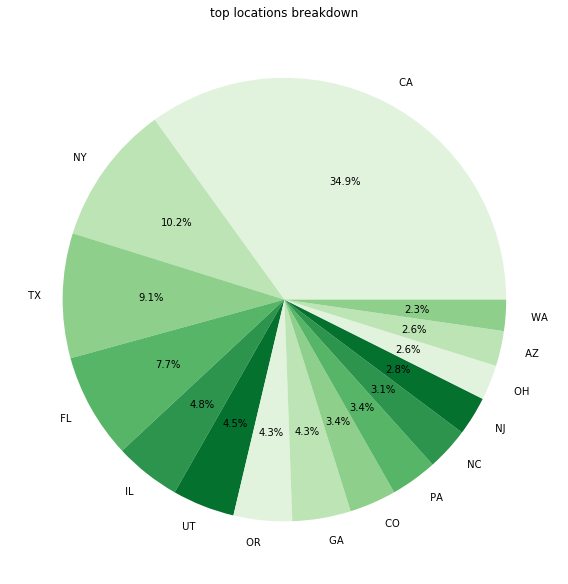

In [87]:
with sns.color_palette('Greens'):
    plt.figure(figsize=(15,8))
    plt.pie(x=location_val,labels=location_key,autopct='%1.1f%%')
    plt.tight_layout()
    plt.title('top locations breakdown')
    plt.show()

In [64]:
location_df = df[df.location.isin(location_key)]

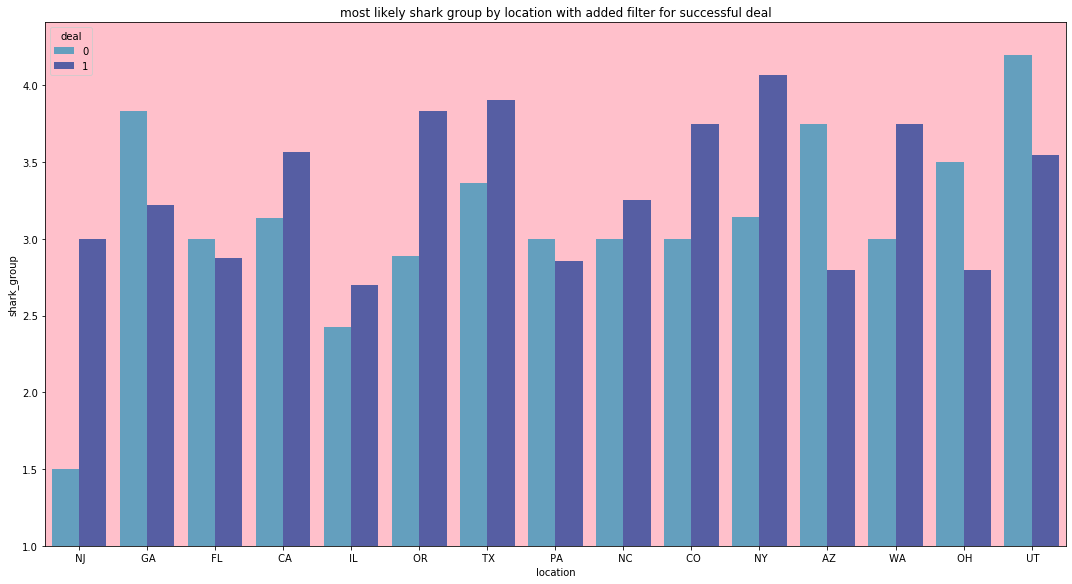

In [85]:
with sns.axes_style({'axes.facecolor':'pink'}):
    with sns.color_palette('icefire'):
        plt.figure(figsize=(15,8))
        sns.barplot(location_df.location,location_df.shark_group,hue=location_df.deal,ci=None)
        plt.tight_layout()
        plt.ylim(1,)
        plt.title('most likely shark group by location with added filter for successful deal')
        plt.show()

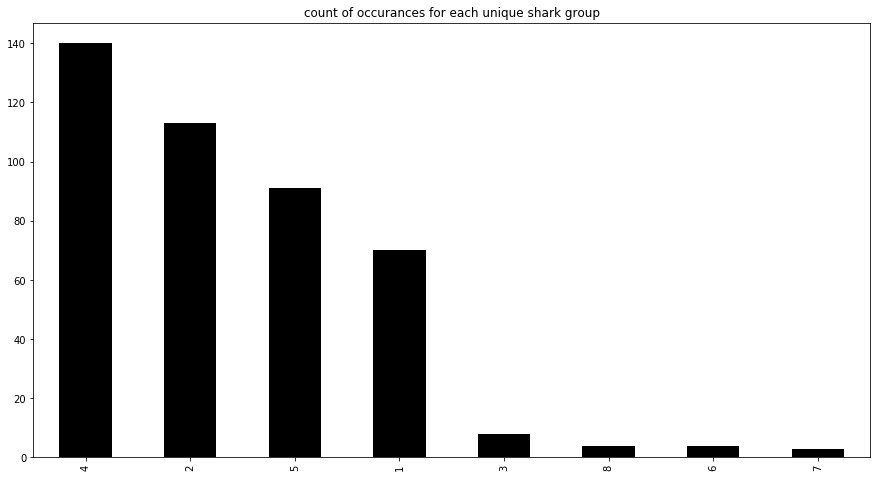

In [93]:
plt.figure(figsize=(15,8))
df.shark_group.value_counts().plot(kind='bar',color='k')
plt.title('count of occurances for each unique shark group')
plt.show()